<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/44_Outlier_Detection_using_the_Percentile_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier Detection using the Percentile Method and Winsorization Technique

**Outlier Detection** is the process of identifying data points that are significantly different from the majority of the data. These data points, called outliers, can skew analysis and negatively impact the performance of statistical models.

The **Percentile Method** is a simple technique for outlier detection. It involves setting upper and lower bounds based on percentiles of the data. For example, you might define outliers as data points falling below the 1st percentile or above the 99th percentile. Any data point outside this range is considered an outlier.

**Winsorization** is a technique used to handle outliers by capping them at a certain value rather than removing them entirely. This is often done in conjunction with the percentile method. For instance, you might replace all values below the 1st percentile with the value of the 1st percentile itself, and all values above the 99th percentile with the value of the 99th percentile. This way, the extreme values are reduced, but their presence in the data is still acknowledged.

Here's a breakdown of the steps involved in Winsorization using the percentile method:

1.  **Determine the percentiles:** Choose the lower and upper percentiles to define the capping values (e.g., 1st and 99th percentiles).
2.  **Calculate the capping values:** Find the actual data values corresponding to the chosen percentiles.
3.  **Apply Winsorization:** Replace any data point below the lower percentile with the lower capping value, and any data point above the upper percentile with the upper capping value.

Winsorization is useful when you want to mitigate the influence of outliers without losing those data points entirely, which can be important for preserving the overall data distribution.

In [5]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("/content/44_weight-height.csv")

In [8]:
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [9]:
df.shape

(10000, 3)

In [10]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [11]:
import seaborn as sns

/tmp/ipython-input-1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])


<Axes: xlabel='Height', ylabel='Density'>

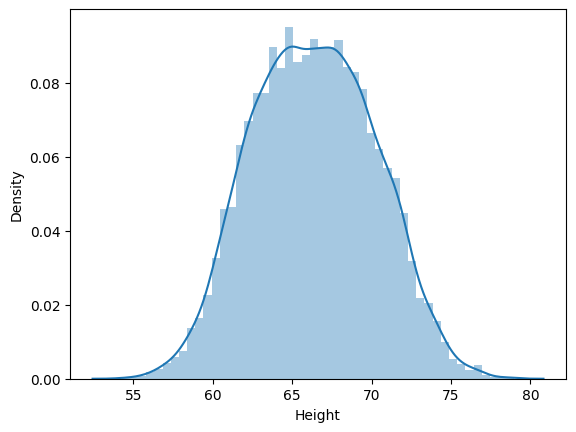

In [12]:
sns.distplot(df["Height"])

<Axes: ylabel='Height'>

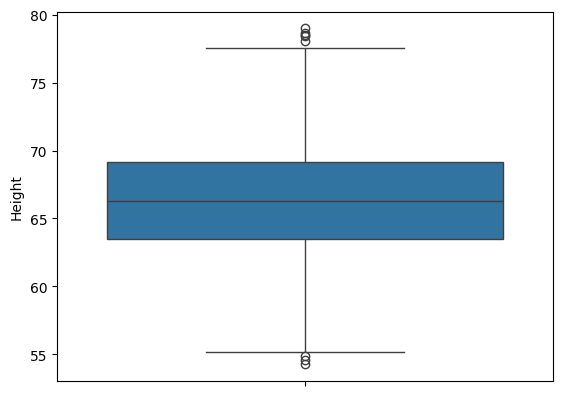

In [13]:
sns.boxplot(df["Height"])

In [14]:
upper_limit = df["Height"].quantile(0.99)
lower_limit = df["Height"].quantile(0.01)

In [15]:
upper_limit, lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

In [16]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [18]:
new_df["Height"].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

/tmp/ipython-input-3280797473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df["Height"])


<Axes: xlabel='Height', ylabel='Density'>

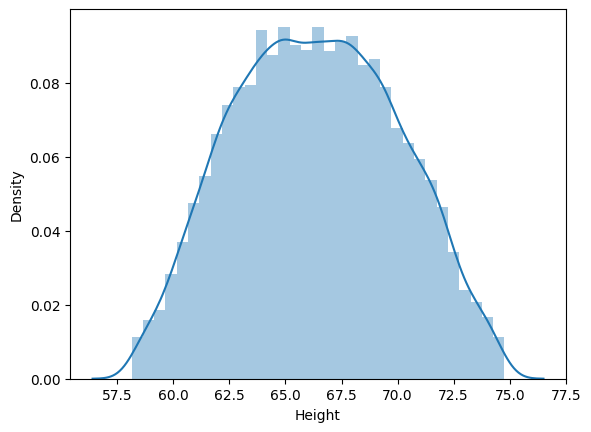

In [19]:
sns.distplot(new_df["Height"])

<Axes: ylabel='Height'>

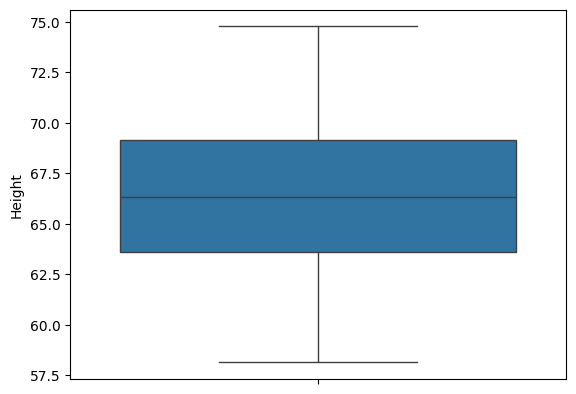

In [20]:
sns.boxplot(new_df["Height"])

### Capping --> Winsorization

In [21]:
df["Height"] = np.where(df["Height"] >= upper_limit,
                        upper_limit,
                        np.where(df["Height"] <= lower_limit,
                                 lower_limit,
                                 df["Height"]))

In [23]:
df.shape

(10000, 3)

In [24]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

/tmp/ipython-input-1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])


<Axes: xlabel='Height', ylabel='Density'>

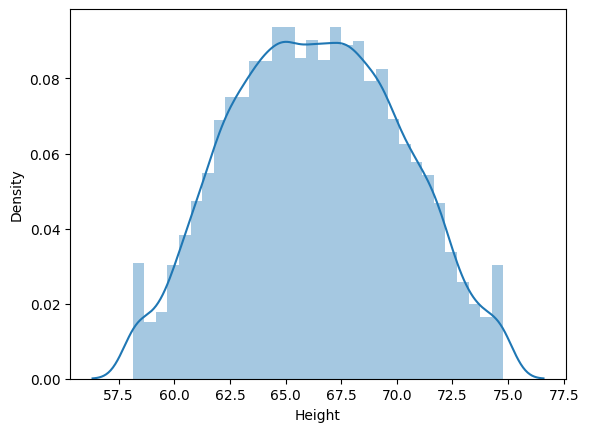

In [25]:
sns.distplot(df["Height"])

<Axes: ylabel='Height'>

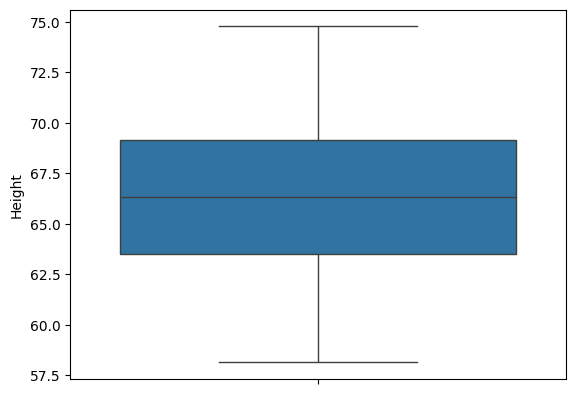

In [26]:
sns.boxplot(df["Height"])